<a href="https://colab.research.google.com/github/ghowtham12/task-7/blob/main/SVM_Assignment14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Social_Network_Ads.csv

**Import libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score,plot_roc_curve

**Importing the dataset**

In [3]:
df=pd.read_csv("Social_Network_Ads.csv")
df.head()
     

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df['Gender']=df.Gender.map({"Male":0,"Female":1})
df.head()
     

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0


**Splitting the dataset into the Training set and Test set**

In [5]:
X=df[["Gender","Age","EstimatedSalary"]].values
y=df["Purchased"].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

**Feature Scaling**

In [6]:
scaler=StandardScaler()
scaler.fit(X_train,y_train)
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
     

**Fitting SVM to the Training set**

In [7]:
from sklearn.svm import SVC #Suport Vector Machine Classifier
model = SVC(kernel='linear',random_state = 7)
model.fit(X_train_scaled,y_train)
model.support_vectors_


array([[-1.00626965,  0.03275409,  0.02489921],
       [-1.00626965, -0.06429506,  0.0541924 ],
       [-1.00626965,  0.42095069, -0.47308504],
       [-1.00626965, -0.06429506,  0.11277879],
       [ 0.99376941, -0.54954082,  1.37238601],
       [ 0.99376941,  0.42095069,  0.14207198],
       [ 0.99376941,  0.32390154,  0.02489921],
       [-1.00626965,  0.42095069, -0.18015313],
       [-1.00626965, -0.25839336,  1.10874729],
       [ 0.99376941,  0.03275409, -0.15085993],
       [-1.00626965,  0.42095069, -0.15085993],
       [ 0.99376941,  0.8091473 ,  0.11277879],
       [-1.00626965,  0.32390154, -0.73672376],
       [-1.00626965, -0.06429506,  0.14207198],
       [ 0.99376941,  0.22685239, -0.29732589],
       [ 0.99376941,  0.32390154, -0.56096461],
       [ 0.99376941,  0.8091473 ,  0.75722899],
       [-1.00626965,  0.22685239, -0.38520546],
       [ 0.99376941,  1.29439305,  1.87037025],
       [ 0.99376941,  0.22685239,  0.0541924 ],
       [ 0.99376941,  0.12980324, -0.268

**Predicting the Test set results**

In [8]:
y_pred=model.predict(X_test_scaled)
print(y_pred)

print("accuracy score:\n",accuracy_score(y_test,y_pred))

[0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0
 0 0 1 0 0 0]
accuracy score:
 0.825


**Making the Confusion Matrix**

Confusion Matrix :  [[48  5]
 [ 9 18]]


Text(69.0, 0.5, 'predicted')

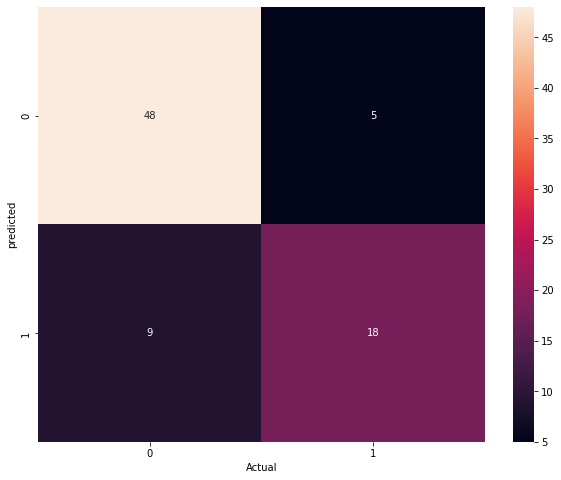

In [11]:
print("Confusion Matrix : ",confusion_matrix(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm,annot=True)
plt.xlabel("Actual")
plt.ylabel("predicted")

**Visualising the Training set results**

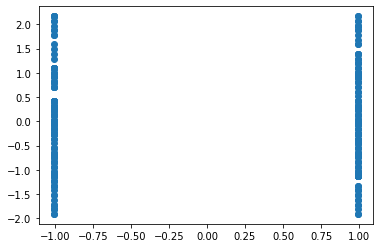

In [12]:
plt.scatter(X_train_scaled[:,0],X_train_scaled[:,1],cmap=plt.cm.coolwarm)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


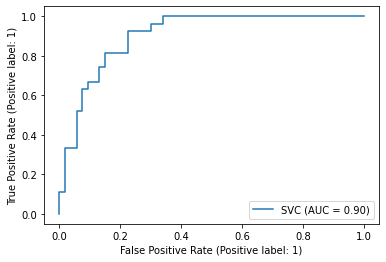

In [13]:
plot_roc_curve(model,X_test_scaled,y_test)
     

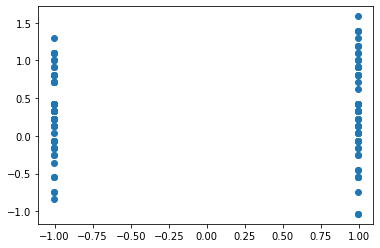

In [14]:
plt.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1])

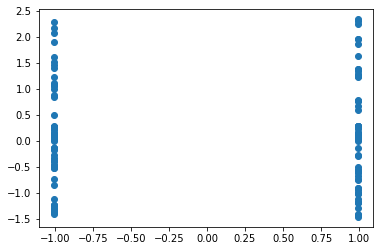

In [15]:
plt.scatter(model.support_vectors_[:,0],model.support_vectors_[:,2])

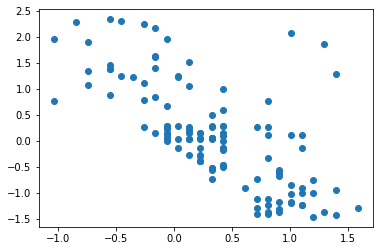

In [16]:

plt.scatter(model.support_vectors_[:,1],model.support_vectors_[:,2])

**Visualising the Test set results**

In [17]:

accuracy_score(y_test,y_pred)

0.825